In [15]:
import numpy as np
from scipy.stats import gmean

In [16]:
def check_average_assumption(ground_truth : np.ndarray, single_site_effects : np.ndarray, unique_sequences : np.ndarray, sequence_effects : np.ndarray, frequencies : np.ndarray) -> None:
    #compute the true background effect
    true_background = single_site_effects/ground_truth

    # compute the average background effect
    average_background = np.zeros((ground_truth.shape[0], ground_truth.shape[1]))
    for state in range(ground_truth.shape[0]):
        for position in range(ground_truth.shape[1]):
            state_indices = np.where(unique_sequences[:, position] == state)[0]
            print("state_indices: ", state_indices)
            default_indices = np.where(unique_sequences[:, position] == 0)[0]
            print("default_indices: ", default_indices)
            average_background[state, position] = (gmean(sequence_effects[state_indices], weights=frequencies[state_indices])/ground_truth[state, position])#/(gmean(sequence_effects[default_indices], weights=frequencies[default_indices])/ground_truth[0, position])

    # check if the true background effect is equal to the average background effect
    print("true background effect: \n", true_background)
    print("average background effect: \n", average_background)
    print("true background effect is equal to average background effect: ", np.allclose(true_background, average_background))

    return true_background, average_background

In [17]:
ground_truth = np.array([[1,1,1], [1, 2, 3], [4, 5, 6], [7, 8, 9]])
single_site_effects = np.array([[1, 1, 1], [1, 1.8, 3], [3.5, 3.9, 5.2], [6.1, 6.9, 7.6]])
unique_sequences = np.array([[0, 3, 0], [0, 1, 2], [1, 2, 0], [2, 0, 1], [1, 3, 0], [1, 0, 3], [0, 2, 1], [3, 1, 1]])
sequence_effects = np.array([1, 1.8, 3, 3.5, 3.9, 5.2, 6.1, 6.9, 7.6])
frequencies = np.array([0.1, 0.2, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1])

check_average_assumption(ground_truth, single_site_effects, unique_sequences, sequence_effects, frequencies)

state_indices:  [0 1 6]
default_indices:  [0 1 6]
state_indices:  [3 5]
default_indices:  [3 5]
state_indices:  [0 2 4]
default_indices:  [0 2 4]
state_indices:  [2 4 5]
default_indices:  [0 1 6]
state_indices:  [1 7]
default_indices:  [3 5]
state_indices:  [3 6 7]
default_indices:  [0 2 4]
state_indices:  [3]
default_indices:  [0 1 6]
state_indices:  [2 6]
default_indices:  [3 5]
state_indices:  [1]
default_indices:  [0 2 4]
state_indices:  [7]
default_indices:  [0 1 6]
state_indices:  [0 4]
default_indices:  [3 5]
state_indices:  [5]
default_indices:  [0 2 4]
true background effect: 
 [[1.         1.         1.        ]
 [1.         0.9        1.        ]
 [0.875      0.78       0.86666667]
 [0.87142857 0.8625     0.84444444]]
average background effect: 
 [[2.10847624 4.2661458  2.59903793]
 [3.92476315 1.40853628 1.76046638]
 [0.875      0.85556999 0.3       ]
 [0.98571429 0.30970847 0.57777778]]
true background effect is equal to average background effect:  False


(array([[1.        , 1.        , 1.        ],
        [1.        , 0.9       , 1.        ],
        [0.875     , 0.78      , 0.86666667],
        [0.87142857, 0.8625    , 0.84444444]]),
 array([[2.10847624, 4.2661458 , 2.59903793],
        [3.92476315, 1.40853628, 1.76046638],
        [0.875     , 0.85556999, 0.3       ],
        [0.98571429, 0.30970847, 0.57777778]]))

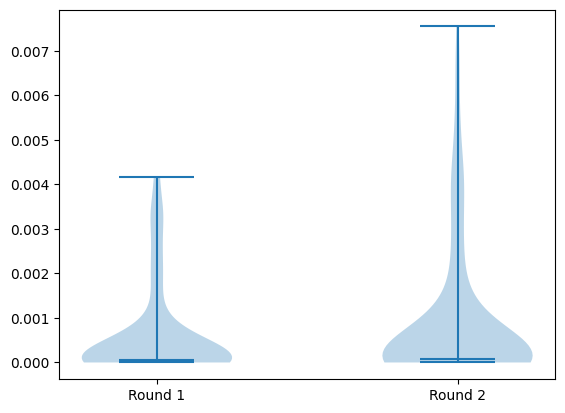

In [34]:
background_diffs_r1 = []
background_diffs_r2 = []
concentrations = [.1, 1, 10]
name = 'deterministic_L_5_q_4_asstest'

for target1 in concentrations:
    for target2 in concentrations:
        path  = f"/datadisk/MIME/{name}/target1_{target1}_target2_{target2}/"

        # load round 1 avg and true backgrounds
        avg_background_r1 = np.loadtxt(path + 'round_1/assumptions/average_background.csv', delimiter=',')
        true_background_r1 = np.loadtxt(path + 'round_1/assumptions/true_background.csv', delimiter=',')
        # remove first row in both
        avg_background_r1 = avg_background_r1[1:]
        true_background_r1 = true_background_r1[1:]

        # log transform
        avg_background_r1 = np.log(avg_background_r1)
        true_background_r1 = np.log(true_background_r1)

        # flatten
        avg_background_r1 = avg_background_r1.flatten()
        true_background_r1 = true_background_r1.flatten()

        # add absolute difference to list
        background_diffs_r1.append(np.abs(avg_background_r1 - true_background_r1))

        # load round 2 avg and true backgrounds
        avg_background_r2 = np.loadtxt(path + 'round_2/assumptions/average_background.csv', delimiter=',')
        true_background_r2 = np.loadtxt(path + 'round_2/assumptions/true_background.csv', delimiter=',')

        # remove first row in both
        avg_background_r2 = avg_background_r2[1:]
        true_background_r2 = true_background_r2[1:]

        # log transform
        avg_background_r2 = np.log(avg_background_r2)
        true_background_r2 = np.log(true_background_r2)

        # flatten
        avg_background_r2 = avg_background_r2.flatten()
        true_background_r2 = true_background_r2.flatten()

        # add absolute difference to list
        background_diffs_r2.append(np.abs(avg_background_r2 - true_background_r2))

# flatten lists
background_diffs_r1 = np.array(background_diffs_r1).flatten()

background_diffs_r2 = np.array(background_diffs_r2).flatten()

# make violin plot
import matplotlib.pyplot as plt

data = [background_diffs_r1, background_diffs_r2]
labels = ['Round 1', 'Round 2']

#violin plot with left and right halves
fig, ax = plt.subplots()
ax.violinplot(data, showmeans=False, showmedians=True)
ax.set_xticks([1, 2])
ax.set_xticklabels(labels)
plt.show()

In [ ]:
def check_independence_assumption(ground_truth : np.ndarray, single_site_frequencies: np.array, sequence_effects : np.ndarray, frequencies : np.ndarray) -> tuple:
    
    # get number_states and sequence length
    number_states, sequence_length = ground_truth.shape

    # compute the geometric mean of the sequence effects
    gmean_sequence_effects = gmean(sequence_effects, weights=frequencies)

    # compute the products of the geometric means of the single site effects (columns are positions, rows are states)
    gmean_single_site_effects = np.prod(gmean(ground_truth, axis=1, weights=single_site_frequencies), axis=0)

    # check if the geometric mean of the sequence effects is equal to the product of the geometric means of the single site effects
    print("gmean sequence effects: ", np.round(gmean_sequence_effects, 5))
    print("product of gmean single site effects: ", np.round(gmean_single_site_effects, 5))
    print("gmean sequence effects is equal to product of gmean single site effects: ", np.isclose(gmean_sequence_effects, gmean_single_site_effects))

    return gmean_sequence_effects, gmean_single_site_effects

In [ ]:
number_states = 4
sequence_length = 5
p_effect = 0.1
p_state_change = 1/4

In [ ]:
def generate_ground_truth(number_states : int, sequence_length : int, p_effect : float, mean : float) -> np.ndarray:
    # default state has value 1
    default_state = np.ones(sequence_length)
    # mutant states are drawn from a log-normal distribution
    mutant_states = np.round(np.random.lognormal(mean=mean, sigma=1, size=(number_states-1, sequence_length)),2)
    # set mutant states to 1 with probability 1 - p_effect
    mutant_states = np.where(np.random.rand(*mutant_states.shape) < 1-p_effect, 1, mutant_states)

    return np.row_stack((default_state, mutant_states))

In [ ]:
def generate_sequences(ground_truth : np.ndarray, p_state_change : float, random : bool = False, pruning : bool = False) -> np.ndarray:

    # get number_states and sequence length
    number_states, sequence_length = ground_truth.shape

    # create every possible sequence
    sequences = np.array(np.meshgrid(*[np.arange(number_states)]*sequence_length)).T.reshape(-1, sequence_length)

    if not random: 
        # calculate the probability of each sequence as p_state_change**number of state changes * (1-p_state_change)**(sequence_length - number of state changes)
        state_changes = np.sum(sequences != np.zeros(sequence_length), axis=1)
        frequencies = (p_state_change/(number_states-1))**state_changes * (1-p_state_change)**(sequence_length - state_changes)

    if random:
        # generate a random frequency for each sequence
        frequencies = np.random.rand(sequences.shape[0])
        # normalize frequencies
        frequencies = frequencies / np.sum(frequencies)

    if pruning:
        # set frequency < 0.00001 to 0
        frequencies = np.where(frequencies < 0.001, 0, frequencies)
        #normalize frequencies
        frequencies = frequencies / np.sum(frequencies)


    # compute effect of each unique sequence
    # effect of a sequence is the product of the effects of the states per position
    sequence_effects = np.array([np.prod([ground_truth[int(sequences[i,j]), j] for j in range(sequence_length)]) for i in range(sequences.shape[0])])

    # print("sequences: ", sequences)
    print("frequencies: ", frequencies)
    print("sequence_effects: ", sequence_effects)

    return sequences, frequencies, sequence_effects

In [ ]:
def compute_single_site_frequencies(sequences : np.ndarray, frequencies : np.ndarray, number_states : int, sequence_length : int) -> np.ndarray:
    # create a matrix of frequencies of each state at each position
    single_site_frequencies = np.zeros((number_states, sequence_length))
    for i in range(number_states):
        for j in range(sequence_length):
            # get the row indices of the unique sequences that have state i at position j
            row_indices = np.where(sequences[:,j] == i)[0]
            # sum the counts of these sequences
            single_site_frequencies[i,j] = np.sum(frequencies[row_indices])

    return single_site_frequencies

In [ ]:
def assumption_test(number_states : int, sequence_length : int, p_effect : float, p_state_change : float, random : bool = False, pruning : bool = False, mean: float = 0) -> None:
    # generate ground truth
    ground_truth = generate_ground_truth(number_states, sequence_length, p_effect, mean)

    # generate sequences
    sequences, frequencies, sequence_effects = generate_sequences(ground_truth, p_state_change, random, pruning)

    # compute single site frequencies
    single_site_frequencies = compute_single_site_frequencies(sequences, frequencies, number_states, sequence_length)

    # check independence assumption
    gmean_sequence_effects, gmean_single_site_effects = check_independence_assumption(ground_truth, single_site_frequencies, sequence_effects, frequencies)

    return np.log(gmean_sequence_effects), np.log(gmean_single_site_effects)

In [ ]:
# do the assumption test for different scenarios with n=100 simulations
n = 100
number_states = 4
sequence_length = 5
p_effect = 0.7
p_state_change = 1/4

det = []
random = []
pruning = []
random_pruning = []

for i in range(n):

    gmean_sequence_effects, gmean_single_site_effects = assumption_test(number_states, sequence_length, p_effect, p_state_change)
    det.append((gmean_sequence_effects, gmean_single_site_effects))
    
    gmean_sequence_effects, gmean_single_site_effects = assumption_test(number_states, sequence_length, p_effect, p_state_change, random=True)
    random.append((gmean_sequence_effects, gmean_single_site_effects))
    
    gmean_sequence_effects, gmean_single_site_effects = assumption_test(number_states, sequence_length, p_effect, p_state_change, pruning=True)
    pruning.append((gmean_sequence_effects, gmean_single_site_effects))

frequencies:  [2.37304688e-01 2.63671875e-02 2.63671875e-02 ... 4.01877572e-06
 4.01877572e-06 4.01877572e-06]
sequence_effects:  [1.         6.84       1.89       ... 2.98009498 0.8234473  0.35290598]
gmean sequence effects:  1.13058
product of gmean single site effects:  1.34251
gmean sequence effects is equal to product of gmean single site effects:  False
frequencies:  [1.75646674e-03 1.05958827e-03 7.16727833e-04 ... 1.84429557e-03
 6.46838522e-05 5.26411475e-04]
sequence_effects:  [1.        0.79      2.86      ... 0.6507072 2.3557248 0.329472 ]
gmean sequence effects:  0.63565
product of gmean single site effects:  0.69755
gmean sequence effects is equal to product of gmean single site effects:  False
frequencies:  [0.26470588 0.02941176 0.02941176 ... 0.         0.         0.        ]
sequence_effects:  [1.         1.52       0.58       ... 3.55244672 1.35553888 6.61409488]
gmean sequence effects:  0.99819
product of gmean single site effects:  0.99474
gmean sequence effects is

In [ ]:
#get differences between gmean_sequence_effects and gmean_single_site_effects
det_diff = [np.abs(det[i][0] - det[i][1]) for i in range(n)]
random_diff = [np.abs(random[i][0] - random[i][1]) for i in range(n)]
pruning_diff = [np.abs(pruning[i][0] - pruning[i][1]) for i in range(n)]

print("deterministic: ", det_diff)
print("random: ", random_diff)
print("pruning: ", pruning_diff)

deterministic:  [0.17181757282198168, 0.6978544871273561, 0.3413041797186289, 0.04293895537474176, 0.02263605344833952, 0.4987091134928236, 0.33171859983862206, 0.06342065124840852, 0.06448771523374808, 0.36306818431514093, 0.5987460216103033, 0.205545774011266, 0.39071037954256616, 0.6109626260708216, 0.40864754658240027, 0.18701403777107733, 0.011471356539505, 0.08312312310756337, 1.2664936146835735, 0.16675037989186925, 0.30265491170234116, 0.25028042560026453, 0.36695937955427643, 0.10434373530053027, 0.5770323754467223, 0.15488176269632709, 0.27208469185575324, 0.901719841933831, 0.6253252251549167, 1.2021016235300372, 0.25319426827630576, 0.15322466436416066, 0.08659831327078149, 0.43147879168864267, 0.012298701267806392, 0.3480338951865355, 0.38937166082826136, 0.2055254751903242, 0.4077079803025165, 0.15183968846529663, 0.3308309023194519, 0.028983577452549657, 0.04570449544517219, 0.48131292059240366, 0.10840685341257432, 0.2396838781798308, 0.17618632459937028, 0.340360709769

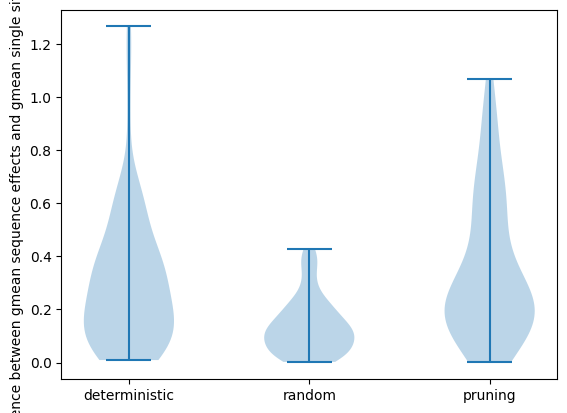

In [ ]:
# make violin plot
import matplotlib.pyplot as plt
import seaborn as sns

data = [det_diff, random_diff, pruning_diff]
labels = ['deterministic', 'random', 'pruning']

fig, ax = plt.subplots()
ax.violinplot(data)
ax.set_xticks(np.arange(1, len(labels) + 1))
ax.set_xticklabels(labels)
plt.show()

In [ ]:
# do the assumption test for different scenarios with n=100 simulations
n = 100
number_states = 4
sequence_length = 5
p_effect = 0.7
p_state_change = 1/4

mean_0 = []
mean_1 = []

for i in range(n):
    
        gmean_sequence_effects, gmean_single_site_effects = assumption_test(number_states, sequence_length, p_effect, p_state_change, mean=0)
        mean_0.append((gmean_sequence_effects, gmean_single_site_effects))
        
        gmean_sequence_effects, gmean_single_site_effects = assumption_test(number_states, sequence_length, p_effect, p_state_change, mean=1)
        mean_1.append((gmean_sequence_effects, gmean_single_site_effects))

#get differences between gmean_sequence_effects and gmean_single_site_effects
mean_0_diff = [np.abs(mean_0[i][0] - mean_0[i][1]) for i in range(n)]
mean_1_diff = [np.abs(mean_1[i][0] - mean_1[i][1]) for i in range(n)]

frequencies:  [2.37304688e-01 2.63671875e-02 2.63671875e-02 ... 4.01877572e-06
 4.01877572e-06 4.01877572e-06]
sequence_effects:  [ 1.       1.07     1.16    ... 10.79844 11.70672  2.22024]
gmean sequence effects:  0.99413
product of gmean single site effects:  0.98597
gmean sequence effects is equal to product of gmean single site effects:  False
frequencies:  [2.37304688e-01 2.63671875e-02 2.63671875e-02 ... 4.01877572e-06
 4.01877572e-06 4.01877572e-06]
sequence_effects:  [  1.           1.           0.86       ...  39.927017    34.33723462
 337.78256382]
gmean sequence effects:  2.54535
product of gmean single site effects:  9.41439
gmean sequence effects is equal to product of gmean single site effects:  False
frequencies:  [2.37304688e-01 2.63671875e-02 2.63671875e-02 ... 4.01877572e-06
 4.01877572e-06 4.01877572e-06]
sequence_effects:  [1.       1.13     0.58     ... 1.185822 0.608652 1.0494  ]
gmean sequence effects:  1.3023
product of gmean single site effects:  1.885
gmean se

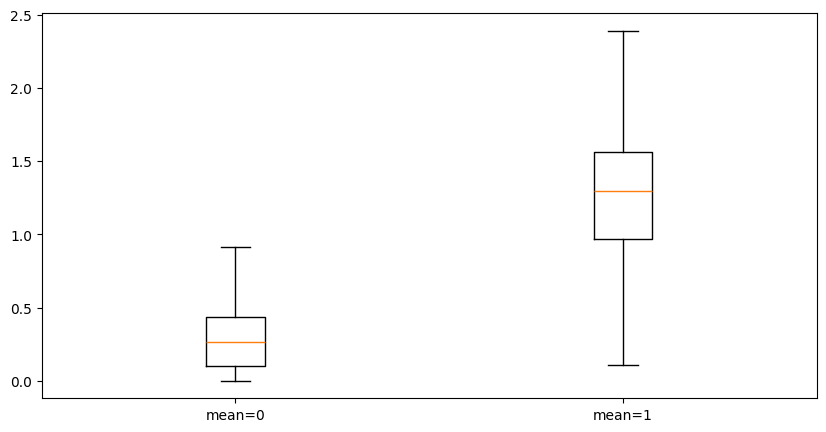

In [ ]:
# make violin plot
data = [mean_0_diff, mean_1_diff]
fig = plt.figure(figsize =(10, 5))
plt.violinplot(data)
plt.xticks([1, 2], ['mean=0', 'mean=1'])
plt.show()

frequencies:  [2.37304688e-01 2.63671875e-02 2.63671875e-02 ... 4.01877572e-06
 4.01877572e-06 4.01877572e-06]
sequence_effects:  [1.         0.31       1.         ... 0.03442364 0.111044   0.16434512]
gmean sequence effects:  0.87617
product of gmean single site effects:  0.72814
gmean sequence effects is equal to product of gmean single site effects:  False
frequencies:  [5.63135147e-02 6.25705719e-03 6.25705719e-03 ... 1.61505583e-11
 1.61505583e-11 1.61505583e-11]
sequence_effects:  [1.        1.        0.6       ... 0.0820435 0.0492261 0.0820435]
gmean sequence effects:  1.00181
product of gmean single site effects:  1.00217
gmean sequence effects is equal to product of gmean single site effects:  False
frequencies:  [2.37304688e-01 2.63671875e-02 2.63671875e-02 ... 4.01877572e-06
 4.01877572e-06 4.01877572e-06]
sequence_effects:  [1.         2.16       1.4        ... 9.79812288 6.3506352  4.536168  ]
gmean sequence effects:  2.10898
product of gmean single site effects:  5.99482


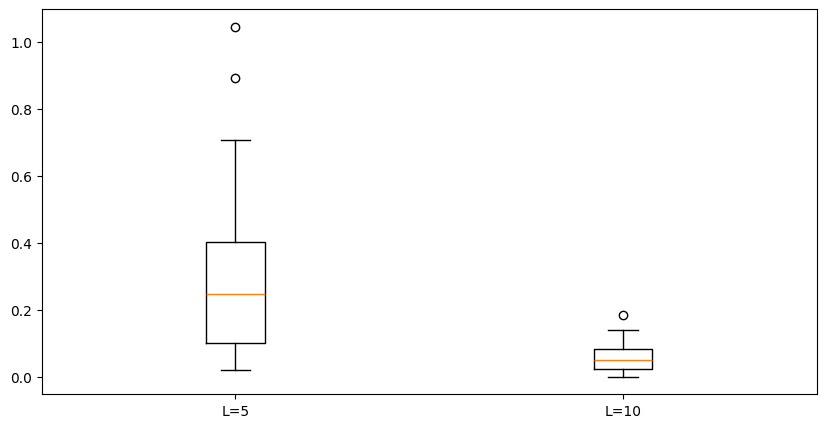

In [ ]:
# do the assumption test for L = 5 and L = 10
n = 100
number_states = 4
sequence_length = 5
p_effect = 0.7
p_state_change = 1/4

L_5 = []
L_10 = []

for i in range(n):
        
            gmean_sequence_effects, gmean_single_site_effects = assumption_test(number_states, 5, p_effect, p_state_change)
            L_5.append((gmean_sequence_effects, gmean_single_site_effects))
            
            gmean_sequence_effects, gmean_single_site_effects = assumption_test(number_states, 10, p_effect, p_state_change)
            L_10.append((gmean_sequence_effects, gmean_single_site_effects))

#get differences between gmean_sequence_effects and gmean_single_site_effects

L_5_diff = [np.abs(L_5[i][0] - L_5[i][1]) for i in range(n)]
L_10_diff = [np.abs(L_10[i][0] - L_10[i][1]) for i in range(n)]

# make violin plot
data = [L_5_diff, L_10_diff]
fig = plt.figure(figsize =(10, 5))
plt.violinplot(data)
plt.xticks([1, 2], ['L=5', 'L=10'])
plt.show()